In [ ]:
# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [40]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

from scipy import misc

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [2]:

def conv_fn(x,h):

    final=listofzeros = [0] * (len(h)+len(x)-1) #create a list of zero the size of the result list
    temporary=np.zeros((len(x), len(h)+len(x)-1)) #create a temporary matrix and fill it with zero
    
    
#create a temporary matrices wich will store the multiplication 
#with the retard adding at each step
    for i in range (0,len(x)):
        for n in range (0,len(h)):
            temporary[i][n+i]=x[i]*h[n] #this will calculate and store the temporary result. The [n+i] 
                                    #add a shifting in the matrix each time that multiply by a new x[i]

#Simply sum each column to return the result            
    for i in range (0,len(final)):
        for n in range (0, len(x)):
            final[i]=temporary[n][i]+final[i]
    
    
    return(temporary)
    

In [3]:
x=[1,2,3,4]

h=[-1,1]
dirac=[1,0,0,0,0]
step=[1,1,1,1,1]
e=[np.exp(0),np.exp(1),np.exp(2),np.exp(3),np.exp(4),np.exp(5)]

conv_fn(x,h)

xsymmetric=[4,3,2,1,1,2,3,4,4,3,2,1]
xperiodic=[1,2,3,4,1,2,3,4,1,2,3,4]
xconstantevaluepadding=[1,1,1,1,2,3,4,4,4,4,4]
H=[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [34]:


def conv_2d(image,kernel_in):
    
    height,width=image.shape[:]

    kernel=len(kernel_in)

    result=np.zeros((height,width))


    temporary=0
    for h in range(0,height):
        for w in range (0,width):
        
            for i in range (-(kernel-1)/2,(kernel-1)/2+1):
                for n in range (-(kernel-1)/2,(kernel-1)/2+1):
                    if ((h-(kernel-1)/2+i<0) | ((w-(kernel-1)/2+n)<0)):
                        result[h][w]=result[h][w]
                    elif ((h+i>=height) | (w+n>=width)):
                        result[h][w]=result[h][w]
                  
                    else:
                        result[h][w]=result[h][w]+image[h+i][w+n]*kernel_in[i][n]/256      
               
                        #add a shifting in the matrix each time that multiply by a new x[i]
    return result        


lena_im=(io.imread('../images/lena-grey.bmp'));

kern=[[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]

lena_gauss=conv_2d(lena_im,kern)

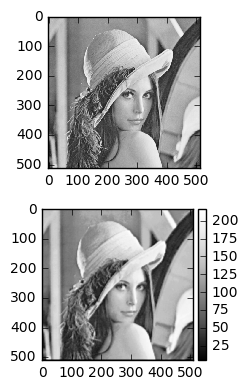

In [35]:

plt.figure
plt.subplot(2,1,1)
io.imshow(image,cmap='Greys_r')   
                  
plt.subplot(2,1,2)
io.imshow(result,cmap='Greys_r') 

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

In [60]:


text_im=img_as_ubyte(rgb2gray(io.imread('../images/text.png')));

a_im=img_as_ubyte(rgb2gray(io.imread('../images/a.png')));




global_otsu = a_im >= threshold_global_otsu

imshow(b)

ImportError: libjpeg.so.62: cannot open shared object file: No such file or directory